<a href="https://colab.research.google.com/github/ragalaa/Machine-Learning-Basics/blob/master/Exploratary_Data_analysis_IMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
"""  Data clean up strategies

  1.As you can see, there might be different types of errors in a dataset:
Outliers: outliers are the numbers in a column that are out of range. In fact, an outlier 
lies outside of most of the other values in a dataset (red cells in the figure).
Duplicates: A dataset can contain repetitive rows or records (purple rows in the figure).
Missing values: We might lose data as the result of human error or missing information (orange cells in the figure).
Bad character or NULL values: Some values may contain bad characters like ₮ or NULL values. 
Sometimes null data may be specified with different values like N/A or NA or NAN (light or dark cells in the figure).


Nominal: an attribute can be categorical like color that can contain a set of restricted values (e.g., blue,red, brown, ... )
Text: an attribute can be a free text or string.
Numeric: an attribute can be numeric (e.g.,currency, scores).

1.Standardize values
2.Normalize values
3.Data validation

"""

In [2]:
# !curl -O https://raw.githubusercontent.com/erajabi/Python_examples/master/movie_sample_dataset.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 15228  100 15228    0     0  71158      0 --:--:-- --:--:-- --:--:-- 71492


In [0]:
import pandas as pd
import numpy as np

In [0]:
dataset = pd.read_csv('./movie_sample_dataset.csv',encoding='utf-8')
# dataset.head()

In [0]:
##First of all, we drop the useless columns:

dataset.drop(['color','language'], axis= 1, inplace= True)


In [0]:
##In the next step, we fill up the empty values of two numeric columns: gross and budget with 0.
dataset['gross'].fillna(0, inplace=True)
dataset['budget'].fillna(0, inplace=True)

In [0]:
##Then, we unify the values for other columns like country, director name, or movie title:
# dataset

In [114]:
# Uppercase all the country values
dataset['country'] = dataset['country'].str.upper()
dataset['country'] = np.where(dataset['country']=='UNITED STATES','USA', dataset['country'])
dataset.head()



,color,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,movie_facebook_likes,GOB,actor1,actor2,actor3
0,Color,Martin Scorsese,240,116866727.0,Biography|Comedy|Crime|Drama,The Wolf of Wall Street,2013,English,USA,100000000.0,8.2,138000,1.168667,Leonardo DiCaprio,Matthew McConaughey,Jon Favreau
1,Color,Shane Black,195,408992272.0,Action|Adventure|Sci-Fi,Iron Man 3,2013,English,USA,200000000.0,7.2,95000,2.044961,Robert Downey Jr.,Jon Favreau,Don Cheadle
2,color,Quentin Tarantino,187,54116191.0,Crime|Drama|Mystery|Thriller|Western,The Hateful Eight,2015,English,USA,44000000.0,7.9,114000,1.229913,Craig Stark,Jennifer Jason Leigh,Zoë Bell
3,Color,Kenneth Lonergan,186,46495.0,Drama,Margaret,2011,English,USA,14000000.0,6.5,0,0.003321,Matt Damon,Kieran Culkin,John Gallagher Jr.
4,Color,Peter Jackson,186,258355354.0,Adventure|Fantasy,The Hobbit: The Desolation of Smaug,2013,English,USA,225000000.0,7.9,83000,1.148246,Aidan Turner,Adam Brown,James Nesbitt


In [0]:
# Bad data entry
dataset['director_name'] = np.where(dataset['director_name']=='N/A','', dataset['director_name'])
dataset['director_name'] = np.where(dataset['director_name']=='NaN','', dataset['director_name'])
dataset['director_name'] = np.where(dataset['director_name']=='Null','', dataset['director_name'])

dataset['movie_title'] = dataset['movie_title'].str.replace('Â', '')


In [0]:
"""
As I mentioned above, one of the solutions to handle the outliers, is filling the correspondent rows with appropriate numbers. 
For example, movie duration in our dataset cannot be less than 10 or more than 300 minutes. 
For those cases, we fill up the cells with zero values.
"""

dataset['duration'] = np.where(dataset['duration']<=10,0, dataset['duration'])
dataset['duration'] = np.where(dataset['duration']>300,0, dataset['duration'])
dataset['imdb_score'] = np.where(dataset['imdb_score']<=0,0, dataset['imdb_score'])
dataset['title_year'] = np.where(dataset['title_year']<2010,0, dataset['title_year'])

In [113]:
"""

To normalize data, we split up actors into three different attributes and drop the actual column as follows:
"""

actor_list = dataset['actors'].str.split(',',n=2 , expand = True)

dataset["actor1"]= actor_list[0] 
dataset["actor2"]= actor_list[1] 
dataset["actor3"]= actor_list[2] 
dataset.drop(columns=['actors'], inplace=True)
dataset.head()



KeyError: ignored

In [0]:
#And finally, we define a new metric called GOB that shows gross over budget for each movie:

# Add a new metric GOB(Gross over Budget)
dataset['GOB'] = dataset.apply(lambda row: row['gross']/row['budget'] if row['budget']!=0 else 0, axis=1)
top_GOB=dataset.sort_values('GOB',ascending=False).head(15)


In [0]:
###As we have the directors’ full names, I add another column to shorten their names to better visualize them in a graph. To do that, 
###I just take the second part of the name, which might be their family name.

top_GOB['director_familyName'] = dataset["director_name"].str.split(" ", n = 2, expand = True) [1]


In [0]:
### Step :2  visualizationThe next step is simply visualizing them in a simple bar chart, as follows:

import matplotlib.pyplot as plt
import seaborn as sns

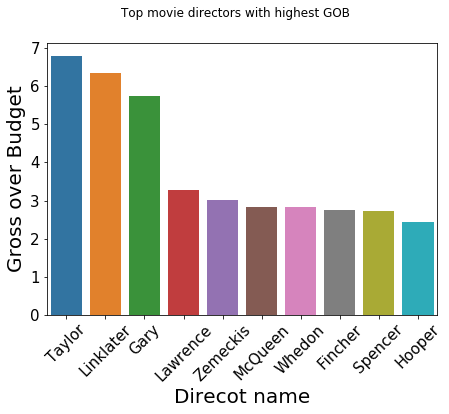

In [85]:
fig,ax = plt.subplots(figsize=(7, 5))
# Draw a bar graph
ax = sns.barplot(x='director_familyName', y='GOB', data=top_GOB,ci=None)
# Rotate the directors' name 45 degrees 
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
# Title the graph
fig.suptitle('Top movie directors with highest GOB', fontsize=12)
# Set font size of axis label
ax.set_xlabel('Direcot name',fontsize=20)
ax.set_ylabel('Gross over Budget',fontsize=20)
# Set tick size of axis 
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
#Show the graph
plt.show();

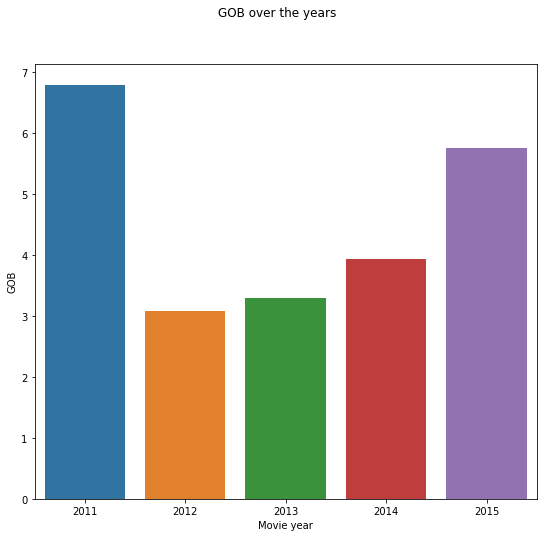

In [97]:
##Which year had the highest GOB?

##The next report is getting the years with high gross over budget scores for all the movies. To do that, we should group the records based on title_year. 
##Pivot table in python is used to group columns and aggregate them based on numeric columns, as shown in the following code.

# Group data based on movie year
dataset_pivot=top_GOB.pivot_table(index=['title_year'], values=['GOB'], aggfunc=np.mean ,margins=True)

##The year column in the dataset includes some missing values, we will ignore it.

# # Some cells are empty in year column
# dataset_pivot = dataset_pivot.loc[dataset_pivot['title_year'] > 0]
# We do not need last record which includes the summary metric
dataset_pivot = dataset_pivot[:-1]
# As index changed after creating a pivot table, we reset the index
dataset_pivot.reset_index(inplace=True)
# Some cells are empty in year column
# dataset_pivot =dataset_pivot.loc[dataset_pivot['title_year']>0]
fig,ax = plt.subplots(figsize=(9, 8))
ax=sns.barplot(x="title_year", y="GOB", data=dataset_pivot)
fig.suptitle('GOB over the years', fontsize=12)
plt.xlabel('Movie year')
plt.show()

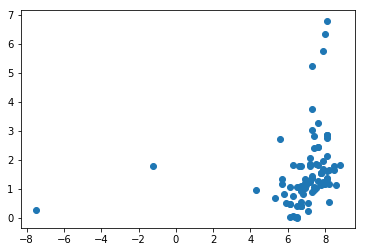

In [100]:
###Can we cluster the movies based on their GOB/ IMDB scores?

"""
To this light, we can choose a clustering algorithm to find groups of data. the algorithm we use, 
depends on several factors including the nature of data, data size, number and types of features in our dataset, etc. I use the K-Means algorithm,one of the popular clustering algorithms, that works iteratively to assign each data point to one of K groups based on the 
features that are provided. Below, you can see how this algorithm works in the figure. Also, you can find more information about clustering at here.



In our dataset, we are looking for a relation between a GOB and IMDB score to see whether or not we can cluster movies based on these two metrics. First, we need to specify the number of clusters we are looking for. I chose three. If you visualize your data in a scatter plot, you may guess about the number of groups you might get from the algorithm, but if not, do not worry. You can change the number of clusters afterwards and run the algorithm again to see if you get a better result or not! 
I use a simple scatter plot in Python to visualize these two metrics (the GOB and IMDB score) on a graph.

"""

plt.scatter(x=dataset['imdb_score'], y=dataset['GOB'])
plt.show()

In [0]:
##Now, I ask the algorithm to cluster my points into three groups.
from sklearn.cluster import KMeans
# Exclude the missing values and selecy only GOB and IMDB score
selected_dataset=dataset.loc[
(dataset['GOB']>0) & dataset['imdb_score']>0][['imdb_score','GOB']]
# Clustering the dataset usinig K-Means algorithm
cls = KMeans(n_clusters=2)
# Fit the model into the algorithm
cls.fit(selected_dataset)
# Give me the center point and label of each group
centroids=cls.cluster_centers_
labels = cls.labels_
# centroids
# red = selected_dataset[labels == 1]
# red
# green = selected_dataset[labels == 0]
# green

'\nWe see three clusters in the figure. First cluster (blue), is the movies with the low GOB score (not sold well) and low IMDB score (not ranked well by IMDB users).\nThe second cluster includes the movies with a very good IMDB score, but not very high GOB score. The third cluster includes few movies with IMDB scores between 7 and 8 and very high GOB. \nLike I said, this is a subset of movies, you can have a better interpretation when you apply the algorithm over all the movies.\n'

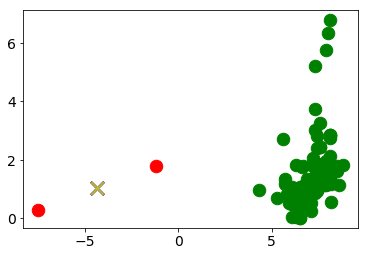

In [212]:
##As the next step, I would like to color the points based on their groups and specify the center of each group with a marker (x).

# We have three cluster, one color for each cluster
colors = ["g.","r.","b.","y.","p"]
# Create an array of each dataset to traverse over the points
dataset_array = np.array(selected_dataset)

# ploting the point on a scatter plot
for i in range(len(dataset_array)):
    plt.plot(dataset_array[i][0], dataset_array[i][1], colors [labels[i]], markersize =25);
    plt.scatter(centroids[:,0], centroids[:,1], marker='x', s=150);



"""
We see three clusters in the figure. First cluster (blue), is the movies with the low GOB score (not sold well) and low IMDB score (not ranked well by IMDB users).
The second cluster includes the movies with a very good IMDB score, but not very high GOB score. The third cluster includes few movies with IMDB scores between 7 and 8 and very high GOB. 
Like I said, this is a subset of movies, you can have a better interpretation when you apply the algorithm over all the movies.
"""

In [0]:
###Is there any relationship between IMDB score and Facebook likes of movies?

"""
To find a relationship between an IMDB score and Facebook likes, we can use regression algorithm. A simple Linear Regression 
can be used to model the relationship between a single input independent variable (in our case Facebook likes) and an output variable (e.g., IMDB score)
using a linear model i.e a line. This is just an example. In reality we may not find a linear relationship between two variables in a dataset. Find more information about the regression algorithms here.

"""

In [156]:
###First of all, we make the Facebook likes in a low scale, as they all have more than 10,000 likes, to better visualize the number in the graph.
selected_dataset['movie_facebook_likes']=dataset['movie_facebook_likes'].apply(lambda row: row/10000)
selected_dataset.head()

,imdb_score,GOB,movie_facebook_likes
0,8.2,1.168667,13.8
1,7.2,2.044961,9.5
2,7.9,1.229913,11.4
3,6.5,0.003321,0.0
4,7.9,1.148246,8.3


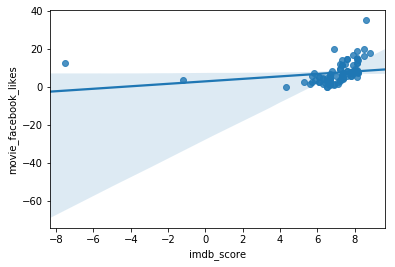

In [160]:
###Then we specify the X and Y axis to be used the regression graph:
import pandas as pd
X = dataset['budget'].values[:,np.newaxis]
y = selected_dataset['movie_facebook_likes'].values


ax=sns.regplot('imdb_score', 'movie_facebook_likes',  selected_dataset);


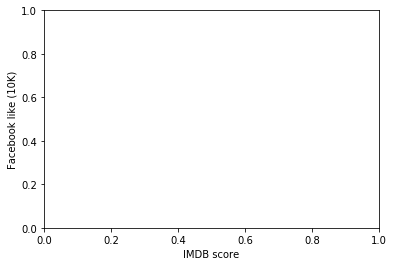

In [161]:
#Then we set the other configurations to make the graph more readable and fancy:

fig.suptitle(' Relation between IMDB score and facebook likes ', fontsize=15)
# Set x-axis label
plt.xlabel('IMDB score');
# Set y-axis label
plt.ylabel('Facebook like (10K)');
fig.set_size_inches(9,8)
font = {'family' : 'Arial',
        'size'   : 14}
plt.rc('font', **font);
plt.show();

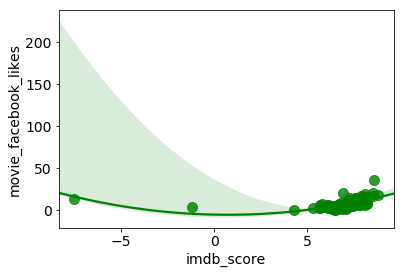

In [178]:
ax=sns.regplot('imdb_score', 'movie_facebook_likes',  selected_dataset, ci=80, scatter_kws={"s":100}, order=2, fit_reg=True,color="g");

Facebook likes estimation (10K): [8.36754048]


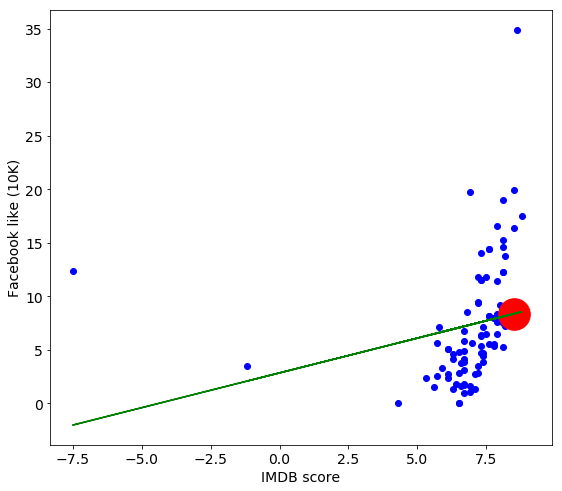

In [175]:
"""
Based on this graph, there is a linear relationship between movies’ IMDB score and their Facebook likes, which means a higher IMDB score results higher Facebook likes.
Having said that, we can use a simple linear regression algorithm to predict 
Facebook likes of a movie based on its IMDB score. In the following code, a movie with IMDB score 8.3 has an estimation of 111,000 likes.
"""
from sklearn.linear_model import LinearRegression
# Assign imdb_score to X as one of our variables
X = selected_dataset['imdb_score'].values[:,np.newaxis]
# Assign Facebook likes to Y
y = selected_dataset['movie_facebook_likes'].values
# Specify the type of mode
model = LinearRegression()
# Fit the model with X and y
model.fit(X, y)
# IMDB score input for our prediction
IMDB_score=8.5
X_test=np.array([IMDB_score]).reshape(1,-1)
# make a prediction based on linear regression
y_predict = model.predict(X_test)
print('Facebook likes estimation (10K):',y_predict)
fig,ax = plt.subplots(figsize=(9, 8))
# Set x-axis label
plt.xlabel('IMDB score');
# Set y-axis label
plt.ylabel('Facebook like (10K)');
# Visualize data and the linear regression line
plt.scatter(X, y,color='b')
plt.plot(X, model.predict(X),color='g')
# Plot the prediction point with a color and size
plt.scatter(X_test, y_predict, color='r', s=1000) 
plt.show()